# Random Forest Classification

In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Run `conda install graphviz pydotplus``
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

## Preparing the Data

In [69]:
# Getting the data from the urls
url_red_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red_wine_data = pd.read_csv(url_red_wine, sep = ';');
white_wine_data = pd.read_csv(url_white_wine, sep = ';');

In [70]:
# Adding the good quality column to the data
red_wine_data["good quality"] = red_wine_data.apply(lambda x: x["quality"] >= 7, axis=1)
white_wine_data["good quality"] = white_wine_data.apply(lambda x: x["quality"] >= 7, axis=1)

In [71]:
# Shuffling and splitting the data into measurements and labels, and training and testing data
red_wine_measurements = red_wine_data.drop(["quality", "good quality"], axis = 1)
red_wine_labels = red_wine_data["good quality"]
train_red_wine_measurements, test_red_wine_measurements, train_red_wine_labels, test_red_wine_labels = \
    train_test_split(red_wine_measurements, red_wine_labels, test_size = 0.25)

white_wine_measurements = white_wine_data.drop(["quality", "good quality"], axis = 1)
white_wine_labels = white_wine_data["good quality"]
train_white_wine_measurements, test_white_wine_measurements, train_white_wine_labels, test_white_wine_labels = \
    train_test_split(white_wine_measurements, white_wine_labels, test_size = 0.25)

## Decision Tree Classifier

A decision tree is a type of supervised learning model used for classification and regression. The model predicts the value of a target variable using simple decision rules inferred from the data features. Structurally, the decision tree is a binary tree where nodes represent a decision rule and edges represent the outcome of the rule. Leaves represent the target variable or the final outcome.

The decision tree is a very intuitive model that is simple to understand and interpret. It mimics the way humans make decisions. As such, the model can be descriced as a white box model. Compared to a black box model like a neural network, where we don't know what is happening inside the model, we can see the decision rules in a decision tree.

It can be considered as a series of if-else statements. The machine learning aspect comes in when we need to determine the optimal decision rules from the data. Here is a great video explaining the theory behind decision trees: https://youtu.be/ZVR2Way4nwQ?si=bT5GbqrGhLYVJJPb.

Simply put, the model chooses the decision rule that best splits the data to maximise the information gain (or reduce entropy). When entropy is high, there is a higher uncertainty about the outcome of a randomly picked point. Conversely, a 'pure' node has an entopy of $0$.  So, it recursively looks for the best way to increase the certainty of the outcome, stopping when it reaches a certain depth or when all the data points are classified correctly.

In [72]:
# Decision Tree Classifier
# See more: https://www.datacamp.com/tutorial/decision-tree-classification-python

dt_red = DecisionTreeClassifier(criterion = "gini", max_depth = None) # default values
dt_red.fit(train_red_wine_measurements, train_red_wine_labels)
dt_red_predictions = dt_red.predict(test_red_wine_measurements)

dt_white = DecisionTreeClassifier(criterion = "gini", max_depth = None) # default values
dt_white.fit(train_white_wine_measurements, train_white_wine_labels)
dt_white_predictions = dt_white.predict(test_white_wine_measurements)

Decision Tree (Red Wine)
Accuracy:  0.8775
Precision:  0.6140350877192983
Recall:  0.5645161290322581


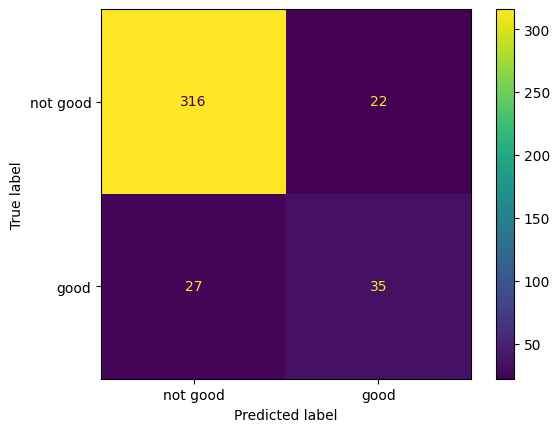

In [73]:
# Decision Tree (Red Wine) Performance
dt_cm_red = confusion_matrix(test_red_wine_labels, dt_red_predictions)
ConfusionMatrixDisplay(dt_cm_red, display_labels = ["not good", "good"]).plot()

dt_accuracy_red = accuracy_score(test_red_wine_labels, dt_red_predictions)
dt_precision_red = precision_score(test_red_wine_labels, dt_red_predictions)
dt_recall_red = recall_score(test_red_wine_labels, dt_red_predictions)

print("Decision Tree (Red Wine)")
print("Accuracy: ", dt_accuracy_red)
print("Precision: ", dt_precision_red)
print("Recall: ", dt_recall_red)

Decision Tree (White Wine)
Accuracy:  0.8416326530612245
Precision:  0.5895522388059702
Recall:  0.6528925619834711


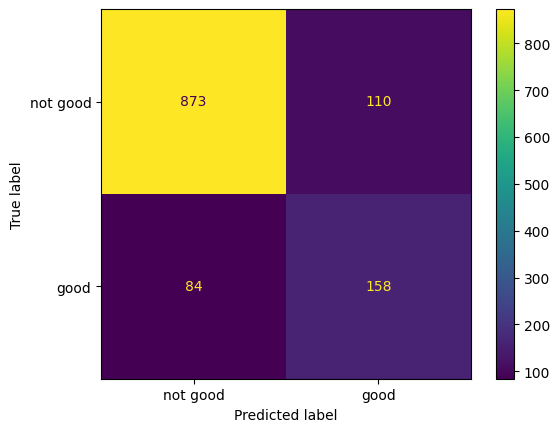

In [74]:
# Decision Tree (White Wine) Performance
dt_cm_white = confusion_matrix(test_white_wine_labels, dt_white_predictions)
ConfusionMatrixDisplay(dt_cm_white, display_labels = ["not good", "good"]).plot()

dt_accuracy_white = accuracy_score(test_white_wine_labels, dt_white_predictions)
dt_precision_white = precision_score(test_white_wine_labels, dt_white_predictions)
dt_recall_white = recall_score(test_white_wine_labels, dt_white_predictions)

print("Decision Tree (White Wine)")
print("Accuracy: ", dt_accuracy_white)
print("Precision: ", dt_precision_white)
print("Recall: ", dt_recall_white)

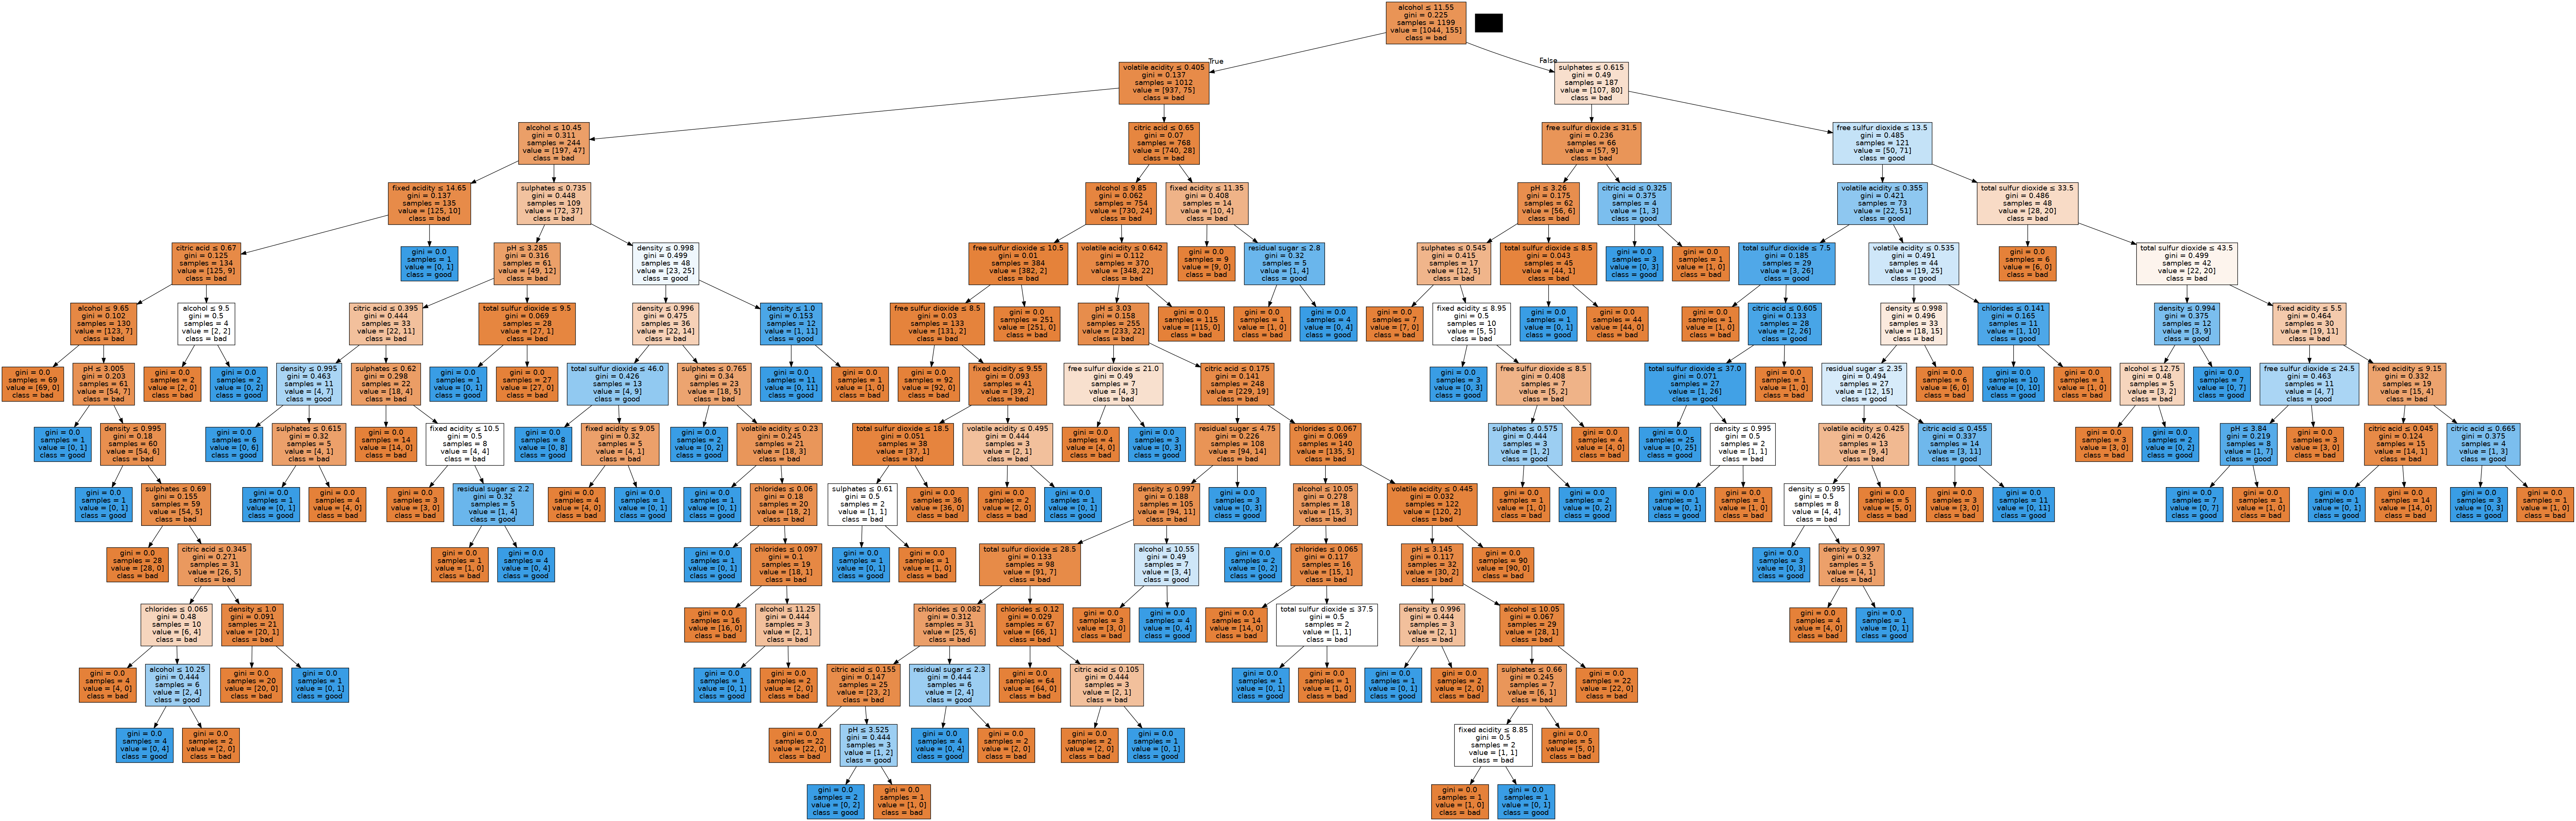

In [75]:
# Visualizing the Decision Tree
dot_data = export_graphviz(dt_red,
                           filled = True,
                           special_characters = True,
                           feature_names = red_wine_measurements.columns,
                           class_names = ["bad", "good"])
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("dt_red.png")
Image(graph.create_png())

## Random Forest Classifier

Decision trees are highly sensitive to training data and this can lead to high variance. They tend to overfit and might fail to generalize well to new data. There are a few things we could do to prevent this, like setting a maximum depth for the decision tree but this might lead to underfitting. The method we are going to look at is called Random Forest.

A random forest (as the name suggests) is a collection of multiple decision trees. As such, they are much less sensitive to initial training data and are less likely to overfit. First, the data is randomly sampled with replacement in a process called bootstrapping. Additionally, only a subset of the features are used to train each tree (called random feature selection). This introduces randomness in the models, reduces the correlation between the trees and reduces the overall variance.

Then, multiple trees are trained on the randomised data. When we want to classify a new point, we aggregate the predictions of all the trees. For classification    problems, we take a majority vote and for regression problems, we average the predictions. Thus, the random forest can be described as an ensemble learning algorithm as it combines multiple models to improve the overall performance.

In [93]:
# Random Forest Classifier
# See more: https://www.datacamp.com/tutorial/random-forests-classifier-python

rf_red = RandomForestClassifier(n_estimators = 100,  criterion = "gini", max_depth = None) # default values
rf_red.fit(train_red_wine_measurements, train_red_wine_labels)
rf_red_predictions = rf_red.predict(test_red_wine_measurements)

rf_white = RandomForestClassifier(n_estimators = 100,  criterion = "gini", max_depth = None) # default values
rf_white.fit(train_white_wine_measurements, train_white_wine_labels)
rf_white_predictions = rf_white.predict(test_white_wine_measurements)

Random Forest (Red Wine)
Accuracy: 0.885
Precision: 0.8333333333333334
Recall: 0.3225806451612903


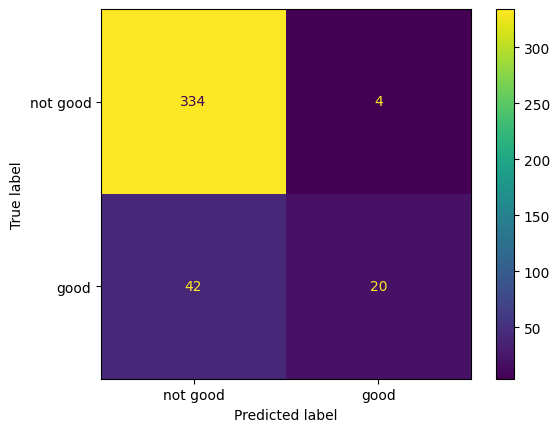

In [92]:
# Random Forest (Red Wine) Performance
rf_cm_red = confusion_matrix(test_red_wine_labels, rf_red_predictions)
ConfusionMatrixDisplay(rf_cm_red, display_labels = ["not good", "good"]).plot()

rf_accuracy_red = accuracy_score(test_red_wine_labels, rf_red_predictions)
rf_precision_red = precision_score(test_red_wine_labels, rf_red_predictions)
rf_recall_red = recall_score(test_red_wine_labels, rf_red_predictions)

print("Random Forest (Red Wine)")
print("Accuracy:", rf_accuracy_red)
print("Precision:", rf_precision_red)
print("Recall:", rf_recall_red)

Random Forest (White Wine)
Accuracy: 0.8979591836734694
Precision: 0.7910447761194029
Recall: 0.6570247933884298


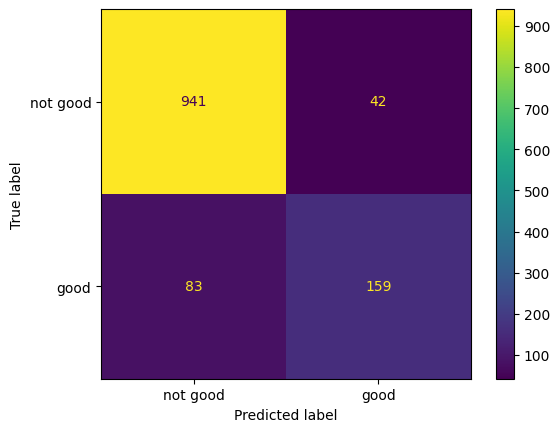

In [78]:
# Random Forest (White Wine) Performance
rf_cm_white = confusion_matrix(test_white_wine_labels, rf_white_predictions)
ConfusionMatrixDisplay(rf_cm_white, display_labels = ["not good", "good"]).plot()

rf_accuracy_white = accuracy_score(test_white_wine_labels, rf_white_predictions)
rf_precision_white = precision_score(test_white_wine_labels, rf_white_predictions)
rf_recall_white = recall_score(test_white_wine_labels, rf_white_predictions)

print("Random Forest (White Wine)")
print("Accuracy:", rf_accuracy_white)
print("Precision:", rf_precision_white)
print("Recall:", rf_recall_white)

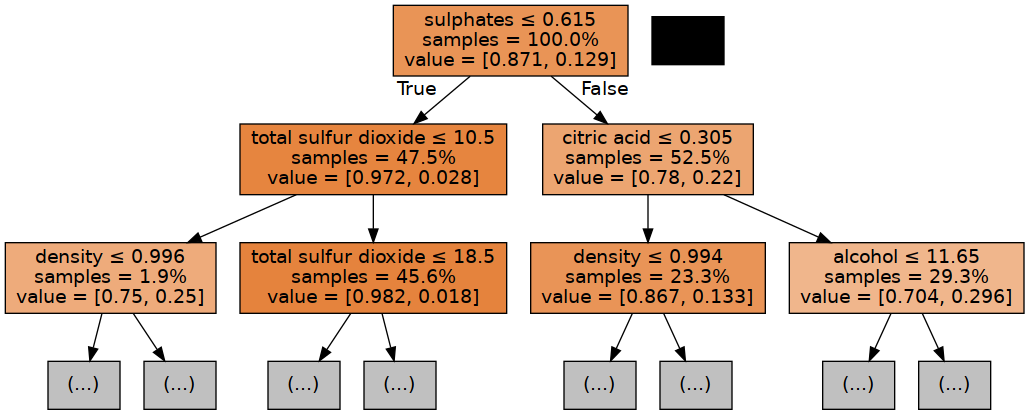

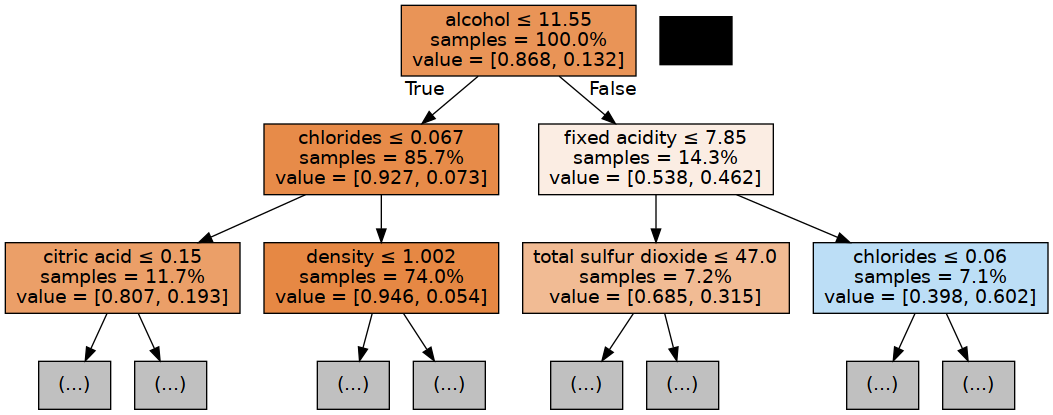

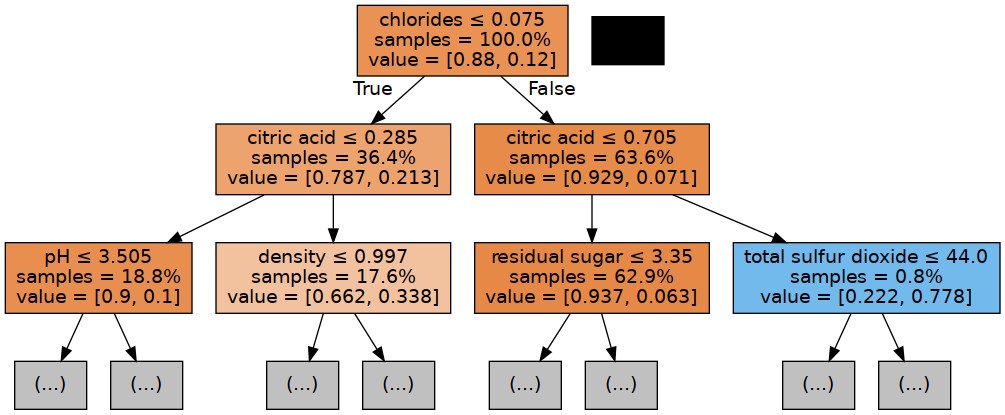

In [79]:
# Visualizing the Random Forest
for i in range(3):
    tree = rf_red.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names = red_wine_data.columns[:-2],   
                               filled = True,
                               special_characters = True,  
                               max_depth = 2,
                               impurity = False, 
                               proportion = True)
    graph = pydotplus.graph_from_dot_data(dot_data)  
    # graph.write_png("name.png")
    display(Image(graph.create_png()))